In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m-%d')

In [5]:
data = pd.read_csv('acgl.us.txt',sep=',',index_col = 'Date', parse_dates=['Date'], date_parser = dateparse).fillna(0)

<ipython-input-4-338e4ebe2ccf>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m-%d')


In [7]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2005-02-25,13.583,13.693,13.430,13.693,156240,0
2005-02-28,13.697,13.827,13.540,13.827,370509,0
2005-03-01,13.780,13.913,13.720,13.760,224484,0
2005-03-02,13.717,13.823,13.667,13.810,286431,0
2005-03-03,13.783,13.783,13.587,13.630,193824,0


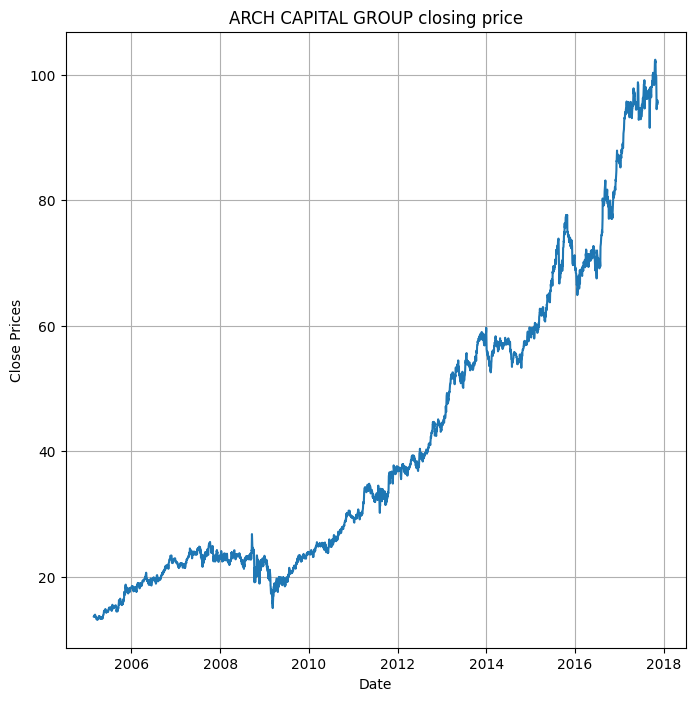

In [43]:
fig = plt.figure(figsize = (8,8))
plt.plot(data['Close'])
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

In [9]:
data_close = data['Close']

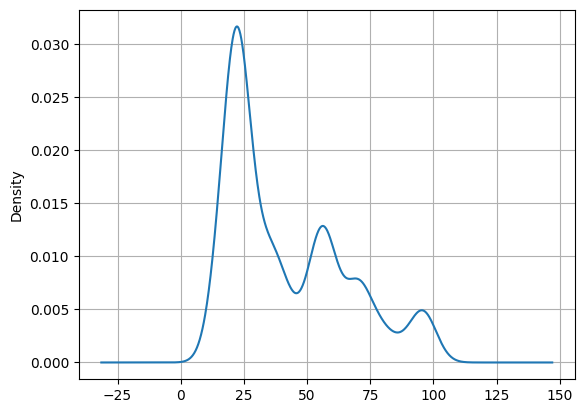

In [44]:
data_close.plot(kind = 'kde')
plt.grid(True)

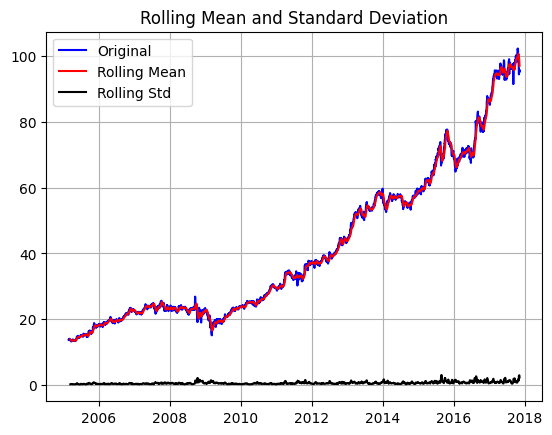

In [45]:
rolmean = data_close.rolling(12).mean()
rolstd = data_close.rolling(12).std()

plt.plot(data_close,color='blue', label = 'Original')
plt.plot(rolmean,color='red',label = 'Rolling Mean')
plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='upper left')
plt.title('Rolling Mean and Standard Deviation')
plt.grid(True)
plt.show()

In [13]:
print("Results of dickey fuller test")

Results of dickey fuller test


In [15]:
adfuller_test = adfuller(data_close,autolag = 'AIC')

In [16]:
adfuller_test

(1.3748985724001848,
 0.9969970726897868,
 5,
 3195,
 {'1%': -3.432398376092501,
  '5%': -2.862445048237253,
  '10%': -2.5672517775230763},
 4466.271741249525)

In [17]:
adfuller_test[0:4]

(1.3748985724001848, 0.9969970726897868, 5, 3195)

In [18]:
adfuller_test[4]

{'1%': -3.432398376092501,
 '5%': -2.862445048237253,
 '10%': -2.5672517775230763}

In [19]:
output = pd.Series(adfuller_test[0:4], index = ['Test Statistics','p-value','No. of lags used','Number of observations used'])

In [20]:
output

Test Statistics                   1.374899
p-value                           0.996997
No. of lags used                  5.000000
Number of observations used    3195.000000
dtype: float64

In [22]:
for key,values in adfuller_test[4].items():
  output['critical value (%s)'%key] = values


In [23]:
print(output)

Test Statistics                   1.374899
p-value                           0.996997
No. of lags used                  5.000000
Number of observations used    3195.000000
critical value (1%)              -3.432398
critical value (5%)              -2.862445
critical value (10%)             -2.567252
dtype: float64


<Figure size 800x800 with 0 Axes>

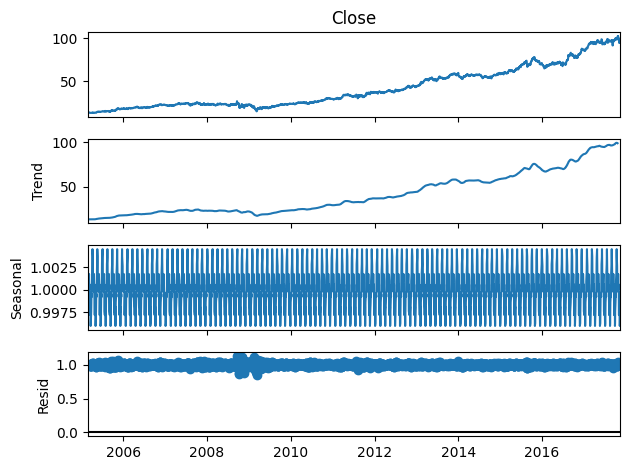

In [30]:
result = seasonal_decompose(data_close, model ='multiplicative',period = 30)
fig = plt.figure(figsize=(8,8))
fig = result.plot()

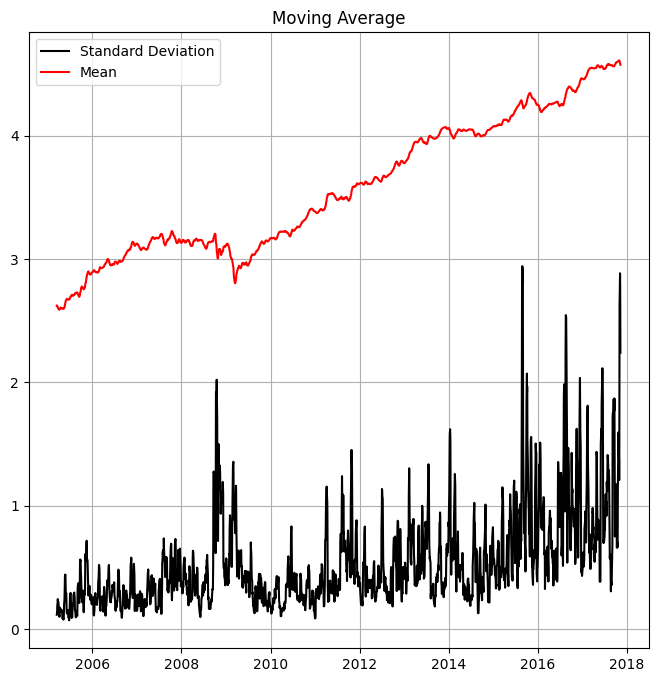

In [46]:
fig = plt.figure(figsize=(8,8))
data_close_log = np.log(data_close)
moving_avg = data_close_log.rolling(12).mean()
std_deviation = data_close.rolling(12).std()
plt.legend(loc='upper left')
plt.title('Moving Average')
plt.plot(std_deviation, color='black', label = 'Standard Deviation')
plt.plot(moving_avg, color = 'red', label = 'Mean')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
data_close_log

Date
2005-02-25    2.616885
2005-02-28    2.626623
2005-03-01    2.621766
2005-03-02    2.625393
2005-03-03    2.612273
                ...   
2017-11-06    4.559650
2017-11-07    4.559754
2017-11-08    4.558603
2017-11-09    4.563410
2017-11-10    4.557554
Name: Close, Length: 3201, dtype: float64

In [36]:
train_data = data_close_log[0 : int(len(data_close_log)*0.9)]

In [37]:
len(data_close_log)

3201

In [38]:
len(train_data)

2880

In [39]:
test_data = data_close_log[int(len(data_close_log) * 0.9) :]

In [40]:
len(test_data)

321

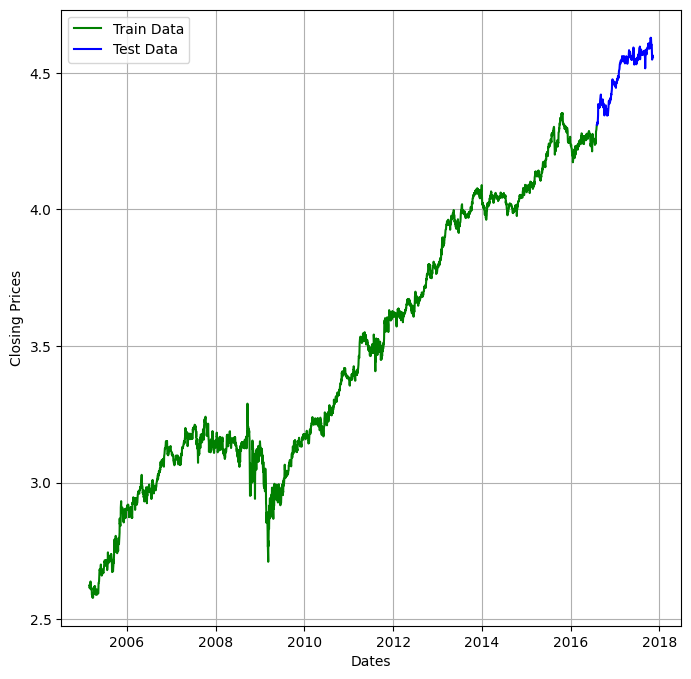

In [42]:
fig = plt.figure(figsize=(8,8))
plt.plot(train_data, color='green', label = 'Train Data')
plt.xlabel('Dates')
plt.grid(True)
plt.ylabel('Closing Prices')
plt.plot(test_data,color='blue',label = 'Test Data')
plt.legend()